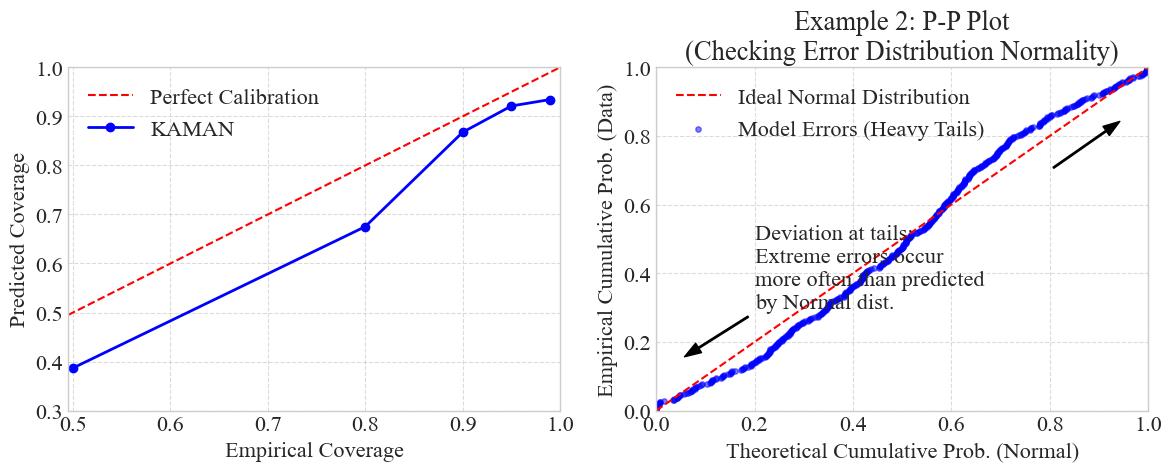

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import font_manager
font_path = "/root/autodl-tmp/fonts/times.ttf"
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Times New Roman'  # 全局字体
plt.rcParams['font.size'] = 16   

# ==========================================
# 图 1: 可靠性图 (Reliability Diagram) 数据生成
# ==========================================
# 模拟一个过度自信的模型 (Overconfident)
# 理论置信度 (Target)
target_confidence = np.array([0.5,0.8, 0.9, 0.95, 0.99])
# 实际观察到的覆盖率 (Observed) - 比理论值低，模拟过度自信
observed_coverage = np.array([0.3869, 0.6752, 0.8676, 0.9212, 0.9344])

# ==========================================
# 图 2: P-P 图 (P-P Plot) 数据生成
# ==========================================
# 模拟肥尾分布 (Heavy Tails)。使用 t 分布来模拟，它的尾巴比正态分布厚。
np.random.seed(42)
# 生成一些自由度较低的 t 分布数据作为误差
errors_heavy_tail = np.random.standard_t(df=3, size=500)
# 标准化误差
errors_std = (errors_heavy_tail - np.mean(errors_heavy_tail)) / np.std(errors_heavy_tail)

# 计算 P-P 图所需的累积概率
# 1. 实际数据的累积概率 (Empirical CDF)
errors_sorted = np.sort(errors_std)
empirical_prob = np.arange(1, len(errors_sorted) + 1) / len(errors_sorted)
# 2. 理论正态分布的累积概率 (Theoretical CDF)
theoretical_prob = stats.norm.cdf(errors_sorted)


# ==========================================
# 开始绘图
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- 绘制图 1: 可靠性图 ---
ax1 = axes[0]
ax1.plot([0, 1], [0, 1], 'r--', label='Perfect Calibration')
ax1.plot(target_confidence, observed_coverage, 'bo-', linewidth=2, label='KAMAN')
ax1.set_xlim([0.495, 1])
ax1.set_ylim([0.3, 1])
ax1.set_xlabel('Empirical Coverage')
ax1.set_ylabel('Predicted Coverage')
# ax1.set_title('Example 1: Reliability Diagram\n(Evaluating Forecast Intervals)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)
# 添加注释箭头
# ax1.annotate('Model lies below diagonal:\nIntervals are too narrow\n(Overconfident)',
#              xy=(0.7, 0.62), xytext=(0.75, 0.4),
#              arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))


# --- 绘制图 2: P-P 图 ---
ax2 = axes[1]
ax2.plot([0, 1], [0, 1], 'r--', label='Ideal Normal Distribution')
ax2.scatter(theoretical_prob, empirical_prob, c='b', alpha=0.5, s=15, label='Model Errors (Heavy Tails)')
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('Theoretical Cumulative Prob. (Normal)')
ax2.set_ylabel('Empirical Cumulative Prob. (Data)')
ax2.set_title('Example 2: P-P Plot\n(Checking Error Distribution Normality)')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)
# 添加注释箭头
ax2.annotate('Deviation at tails:\nExtreme errors occur\nmore often than predicted\nby Normal dist.',
             xy=(0.05, 0.15), xytext=(0.2, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))
ax2.annotate('', xy=(0.95, 0.85), xytext=(0.8, 0.7),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))
plt.tight_layout()
plt.savefig("img/reliability diagrams.jpg",dpi=300)